# LAB 2_1 Mandatory Assignments + First Bonus Trak
Author: Aliprandi Francesco

In [1]:
from utils import read_data, firing_rate_model, plot_1, plot_2, save_weights

import matplotlib.pyplot as plt 
import numpy as np

In [2]:
path = "data/lab2_1_data.csv"
u = read_data(path)

print(f"Dataset shape: {u.shape}")

Dataset shape: (2, 100)


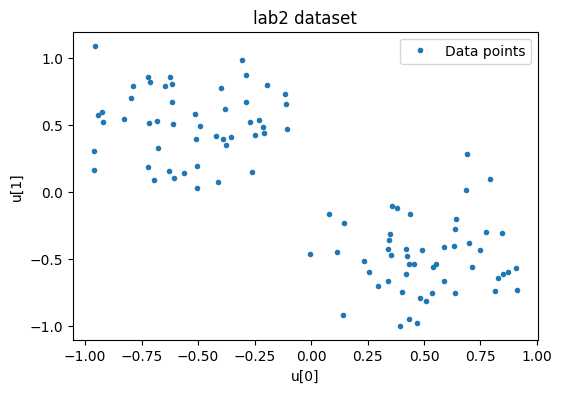

In [3]:
plt.figure(figsize=(6,4))
plt.plot(u[0], u[1], "o", markersize=3, label="Data points")
plt.xlabel("u[0]")
plt.ylabel("u[1]")
plt.title("lab2 dataset")
plt.legend()

plt.show()

### Assignment 1: Basic Hebbian Learning

In [4]:
epochs = 1000   
lr = 0.01
delta = 0.0001
     
w, w_history, convergence = firing_rate_model("hebb", u, epochs, lr, delta, seed=42)
save_weights(w_history, "hebb_rule")

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000


In [ ]:
# Extra code to convert back weights if needed:
hebb_weights = np.load("outputs/hebb_rule/weights.npz")
hebb_weights = [hebb_weights[f"arr_{i}"] for i in range(len(hebb_weights.files))]
print(hebb_weights)

[array([-0.67991844,  1.37492178]), array([-1.46161845,  2.20516904]), array([-2.89033383,  3.6616856 ]), array([-5.44543158,  6.25950224]), array([-10.06970046,  10.84820725]), array([-18.30695055,  19.07177641]), array([-33.12112554,  33.67759041]), array([-59.62153656,  59.75099534]), array([-106.79626769,  106.5241024 ]), array([-191.28769786,  189.9214864 ]), array([-342.38276634,  338.85459985]), array([-613.32752304,  604.07419511]), array([-1093.6570329 ,  1081.92501182]), array([-1953.54486657,  1934.33790236]), array([-3495.31692285,  3452.47429107]), array([-6274.63656086,  6141.97373739]), array([-11155.16933218,  11035.21470274]), array([-19890.42287869,  19765.511321  ]), array([-35621.69822279,  35245.52285414]), array([-63787.00153663,  62856.16885416]), array([-113679.13810738,  112642.43050282]), array([-202908.67797698,  201549.72412399]), array([-362139.48920731,  360652.92887855]), array([-648373.44250619,  643281.15560183]), array([-1156617.19705133,  1151682.8805

In [5]:
q = np.cov(u)
eval, evec = np.linalg.eig(q)
p_evec = evec.T[np.argmax(eval)]

print(f"Correlation Matrix: \n{q}")
print(f"\nPrincipal eigenvector of input correlation matrix: {p_evec}")


Correlation Matrix: 
[[ 0.3297068  -0.26166261]
 [-0.26166261  0.32491515]]

Principal eigenvector of input correlation matrix: [ 0.71033647 -0.70386228]


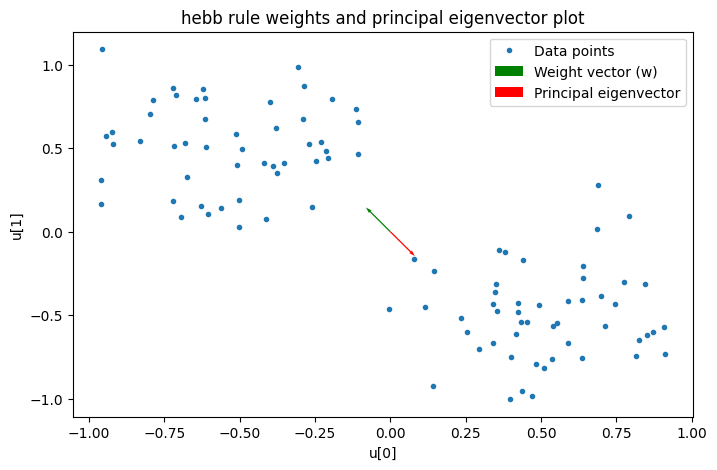

In [6]:
plot_1(u, w, p_evec, "hebb_rule")

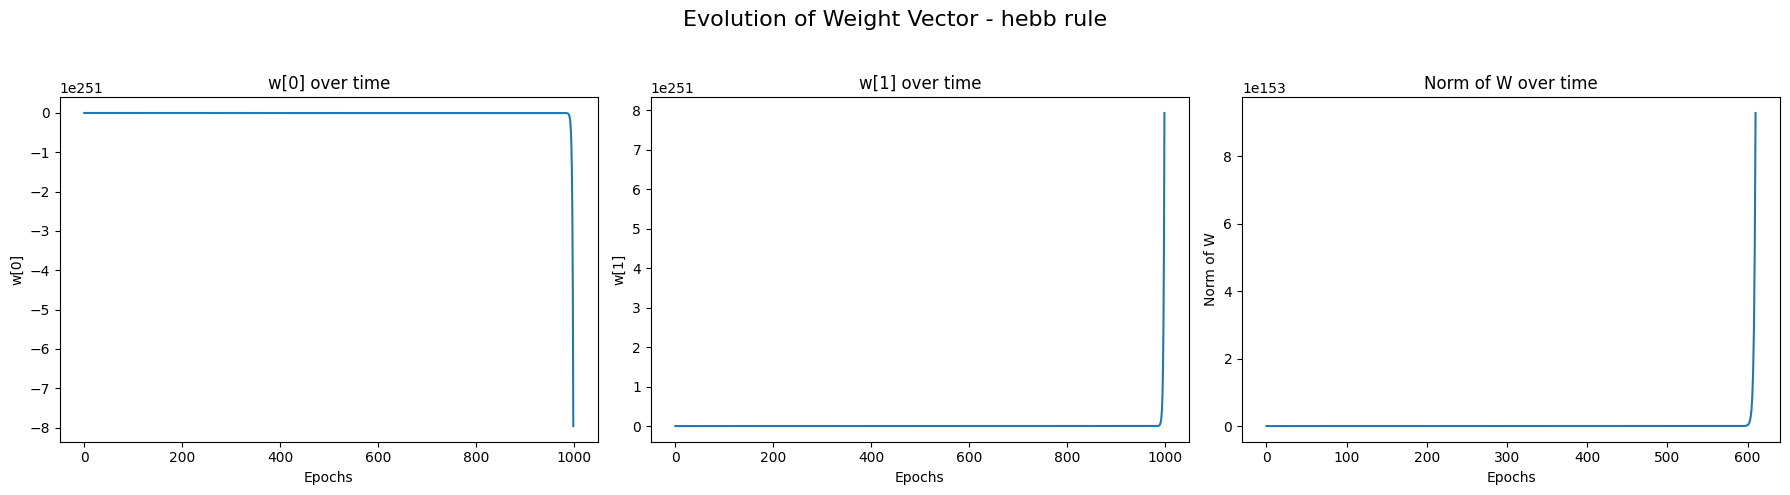

In [7]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "hebb_rule")

Nota: the 3rd plot ends at iteration n. 600 because norm of weight vector become infinit

### Assignment 2: Oja rule

In [8]:
epochs = 1000   
lr = 0.001
delta = 0.000001
alpha = 0.01
     
w, w_history, convergence = firing_rate_model("oja", u, epochs, lr, delta, alpha=alpha, seed=42)
save_weights(w_history, "oja_rule")

Running epoch  100
Running epoch  200
Convergence reach at epoch 226


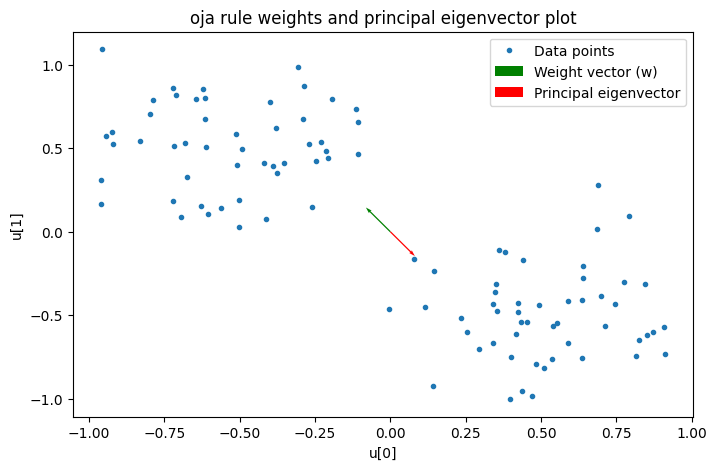

In [9]:
plot_1(u, w, p_evec, "oja_rule")

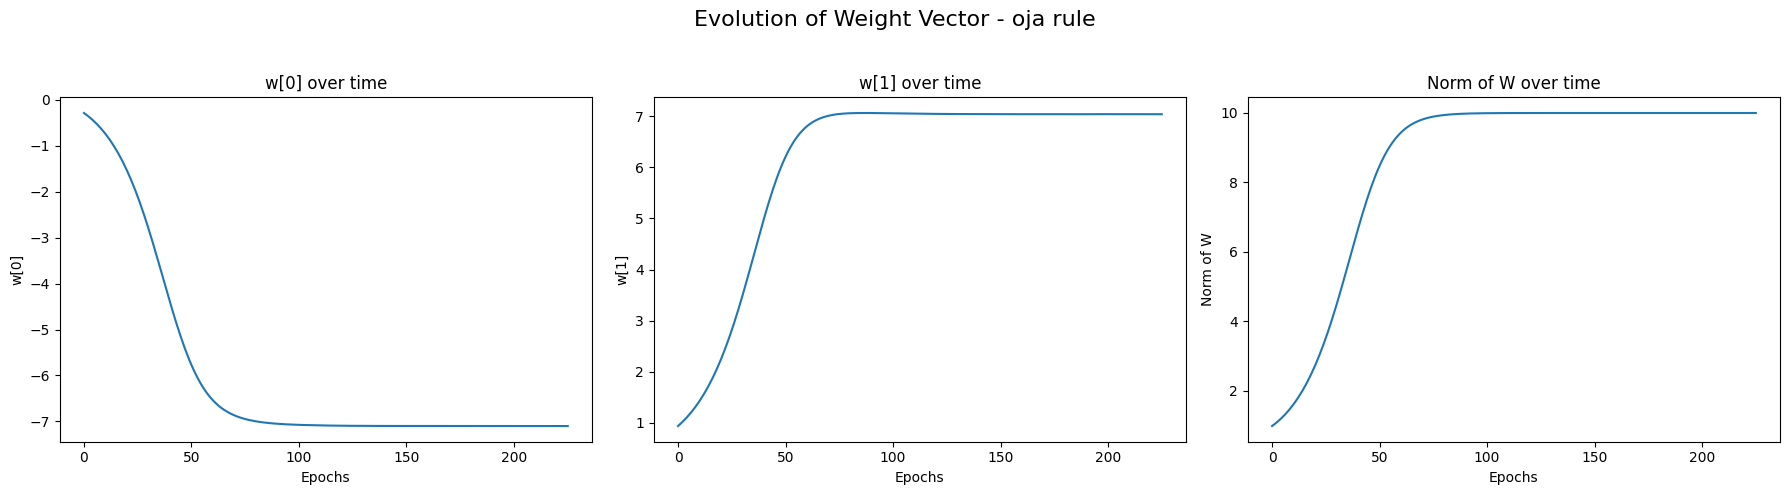

In [10]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "oja_rule")

### Assignment 3: Subtractive Normalization

In [11]:
epochs = 1000  
lr = 0.001
delta = 0.00001
     
w, w_history, convergence = firing_rate_model("sub-norm", u, epochs, lr, delta, seed=42)
save_weights(w_history, "sub_norm_rule")

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000


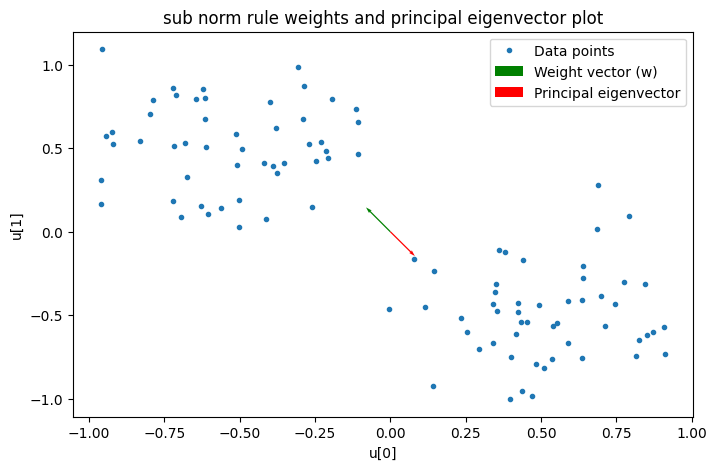

In [12]:
plot_1(u, w, p_evec, "sub_norm_rule")

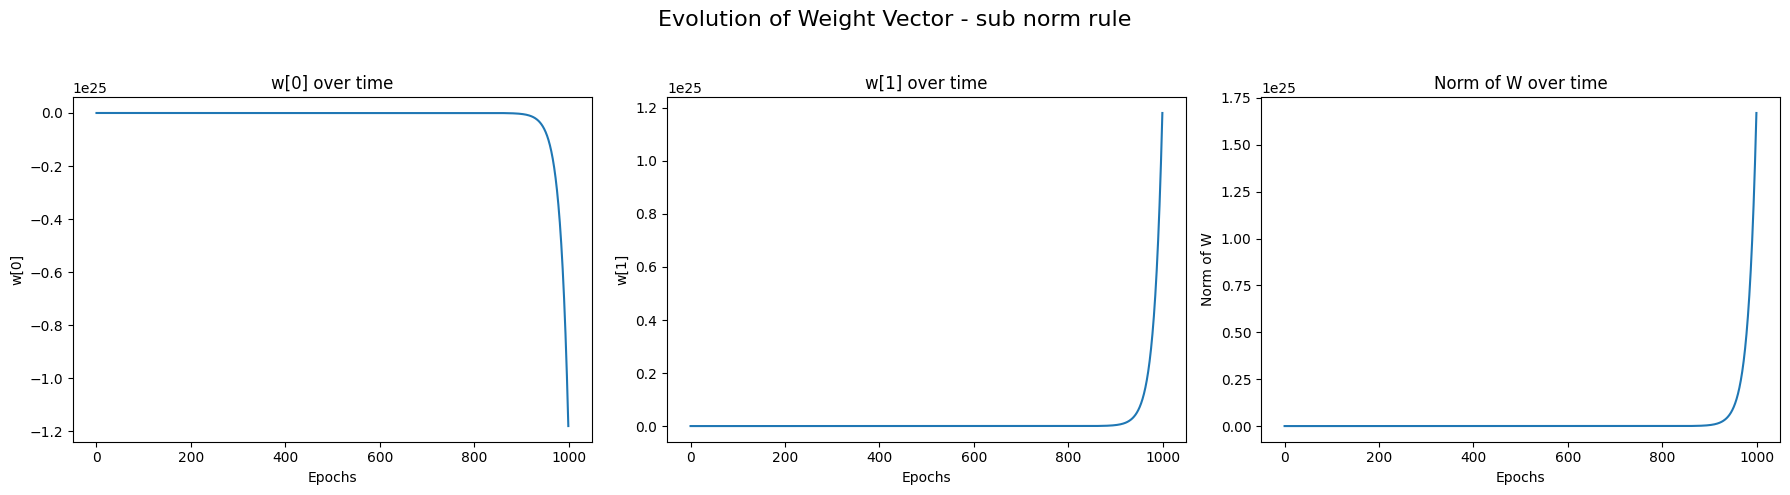

In [13]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "sub_norm_rule")

#### Extra plot of weight's component summation

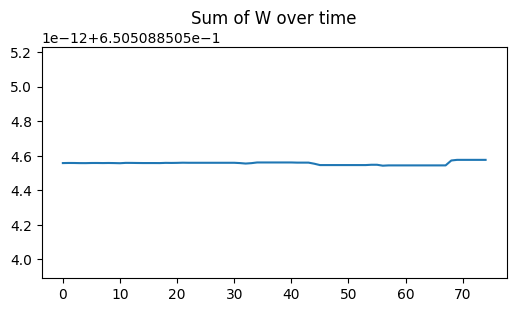

In [14]:
sum_hist = np.zeros(convergence)
for i,w in enumerate(w_history):
    sum_hist[i] = w[0] + w[1]
    
plt.figure(figsize=(6,3))
plt.plot(tspan[:75], sum_hist[:75])
plt.title("Sum of W over time")
plt.show()

This plot is cut because of instability in computation of the summation

### Bonus Track Assignment 1 – BCM Rule

In [15]:
epochs = 10000  
lr = 0.0005
delta = 0.00001
np.random.seed(42)
theta = np.random.uniform(0, 1)
     
w, w_history, convergence = firing_rate_model("BCM", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "BCM_rule")

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000
Running epoch  1100
Running epoch  1200
Running epoch  1300
Running epoch  1400
Running epoch  1500
Running epoch  1600
Running epoch  1700
Running epoch  1800
Running epoch  1900
Running epoch  2000
Running epoch  2100
Running epoch  2200
Running epoch  2300
Running epoch  2400
Running epoch  2500
Running epoch  2600
Running epoch  2700
Running epoch  2800
Running epoch  2900
Running epoch  3000
Running epoch  3100
Running epoch  3200
Running epoch  3300
Running epoch  3400
Running epoch  3500
Running epoch  3600
Running epoch  3700
Running epoch  3800
Running epoch  3900
Running epoch  4000
Running epoch  4100
Running epoch  4200
Running epoch  4300
Running epoch  4400
Running epoch  4500
Running epoch  4600
Running epoch  4700
Running epoch  4800
Running epoch  4900
Running epoch  5000
Running e

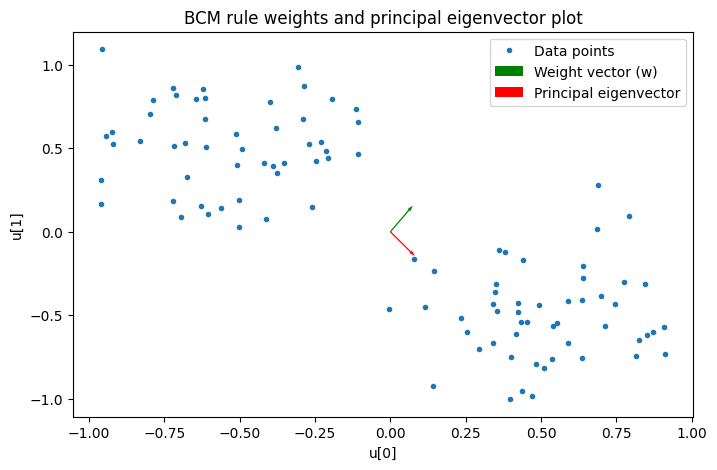

In [16]:
plot_1(u, w, p_evec, "BCM_rule")

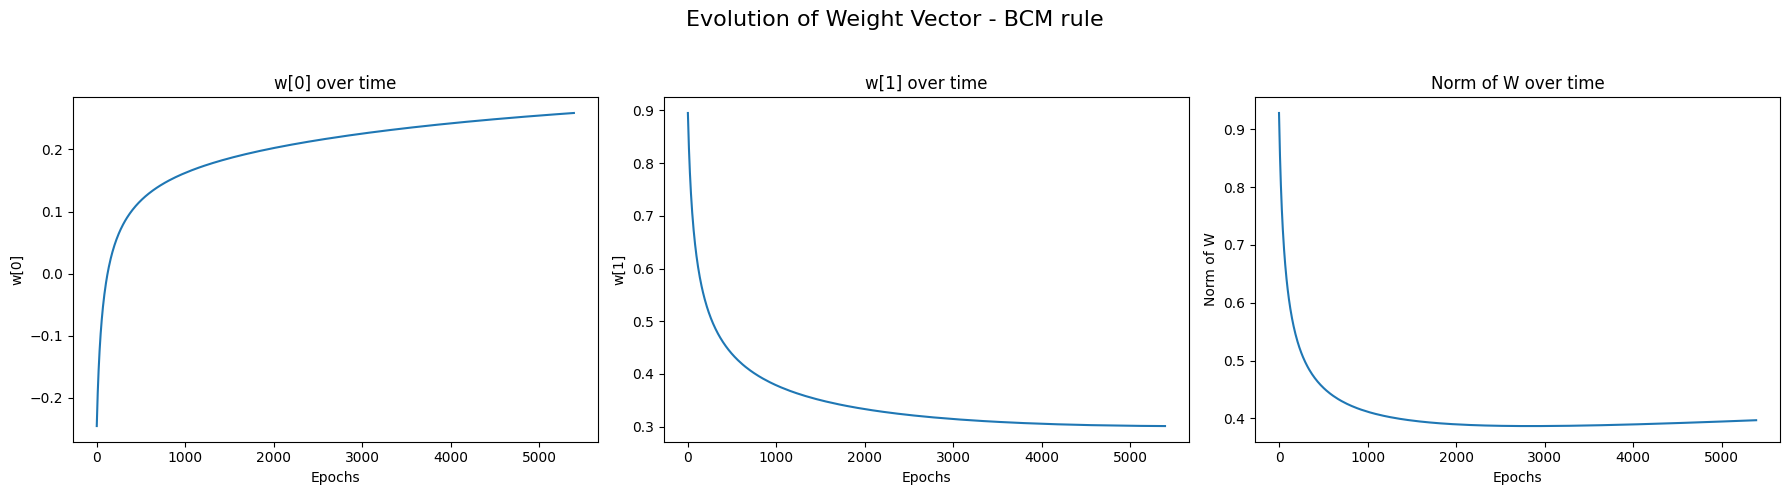

In [17]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "BCM_rule")

### Bonus Track Assignment 2 – Covariance Rule

In [18]:
epochs = 1000  
lr = 0.001
delta = 0.00001
theta = 0.5
     
w, w_history, convergence = firing_rate_model("cov", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "covariance_rule")

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000


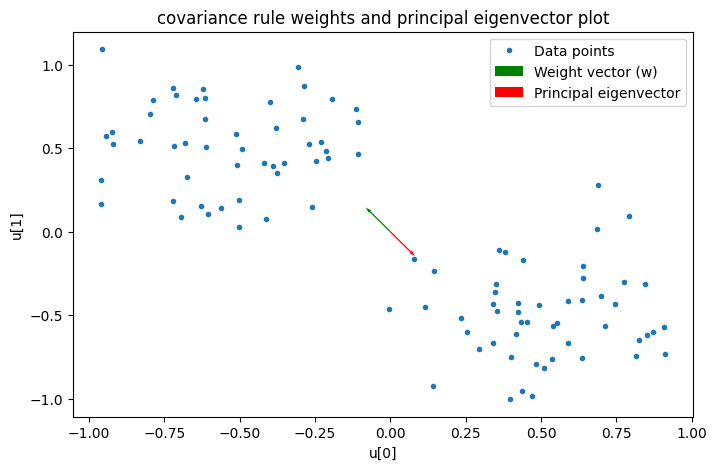

In [19]:
plot_1(u, w, p_evec, "covariance_rule")

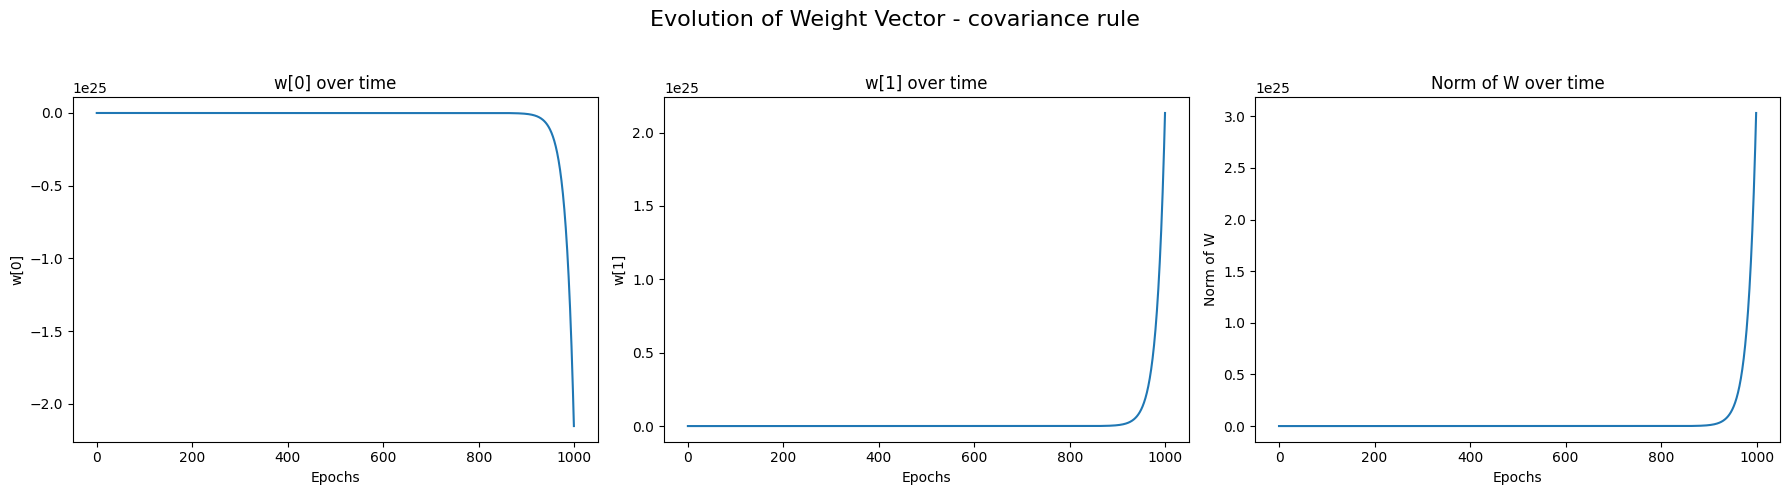

In [20]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "covariance_rule")